# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom modules
from loadData import LoadData, CocoHelper

# Objects

In [2]:
dataDir= "../data/coco/"

ld_ob = LoadData(dataDir)    # (dataDir='../data/coco/')
co_ob = CocoHelper(dataDir) # (dataDir='../data/coco/', dataType=['train2017', 'val2017'])



coco1, coco2 = co_ob.coco1, co_ob.coco2 # train, val objects of coco
cc1, cc2 = co_ob.coco1['loaded_annFile'], co_ob.coco2['loaded_annFile'] # train, val loaded annptations

loading annotations into memory...
Done (t=17.30s)
creating index...
index created!

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!



# Super Categories and Categories

In [3]:
sup_c, c = ld_ob.get_all_category_dict(cc1,coco1['categories'], coco1['sup_categories'])

print("Super Categories:\n",sup_c,"\n")
print("Categories:\n",c)

Super Categories:
 {'sports': [34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 'animal': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'accessory': [27, 28, 31, 32, 33], 'electronic': [72, 73, 74, 75, 76, 77], 'outdoor': [10, 11, 13, 14, 15], 'indoor': [84, 85, 86, 87, 88, 89, 90], 'furniture': [62, 63, 64, 65, 67, 70], 'food': [52, 53, 54, 55, 56, 57, 58, 59, 60, 61], 'vehicle': [2, 3, 4, 5, 6, 7, 8, 9], 'appliance': [78, 79, 80, 81, 82], 'kitchen': [44, 46, 47, 48, 49, 50, 51], 'person': [1]} 

Categories:
 {'person': [1], 'bicycle': [2], 'car': [3], 'motorcycle': [4], 'airplane': [5], 'bus': [6], 'train': [7], 'truck': [8], 'boat': [9], 'traffic light': [10], 'fire hydrant': [11], 'stop sign': [13], 'parking meter': [14], 'bench': [15], 'bird': [16], 'cat': [17], 'dog': [18], 'horse': [19], 'sheep': [20], 'cow': [21], 'elephant': [22], 'bear': [23], 'zebra': [24], 'giraffe': [25], 'backpack': [27], 'umbrella': [28], 'handbag': [31], 'tie': [32], 'suitcase': [33], 'frisbee': [34], 'skis': [35],

In [4]:
# reverse dict

vals = list(c.keys())
keys = list(c.values())

reverse_dict = {}
for i,j in zip(keys,vals):
    for k in i:
        reverse_dict[k] = j

In [5]:
print(reverse_dict)

{1: 'person', 2: 'bicycle', 3: 'carrot', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'hot dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'teddy bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone

# Load image->path dataframe

In [6]:
img_path_df = ld_ob.getImgPath_DataFrame() # get dataframe of all images
img_path_df.head()

Loaded  118287 Imgaes from : train2017 
Loaded    5000 Imgaes from : val2017 
Loaded   40670 Imgaes from : test2017 
Loaded  163957 Imgaes from : ../data/coco/ 


id                                     path
0  298722  ../data/coco/train2017/000000298722.jpg
1  214972  ../data/coco/train2017/000000214972.jpg
2  225215  ../data/coco/train2017/000000225215.jpg
3  445425  ../data/coco/train2017/000000445425.jpg
4  428599  ../data/coco/train2017/000000428599.jpg

# Get Image Category dataframe : `master_df`

In [7]:
master_df_train = co_ob.getImgCat_Datframe(cc1,"train")
master_df_val = co_ob.getImgCat_Datframe(cc2,"val")

master_df_train.head(10)

id  1  2  3  4  5  6  7  8  9  ...  80  81  82  84  85  86  87  88  89  \
0  391895  1  1  0  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
1  522418  1  0  0  0  0  0  0  0  0  ...   0   1   0   0   0   0   0   0   0   
2  184613  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
3  318219  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
4  554625  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
5  574769  1  0  0  0  0  0  0  0  0  ...   0   1   1   0   1   0   0   0   0   
6   60623  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
7  309022  0  0  0  0  0  0  0  0  0  ...   0   1   0   0   0   0   0   0   0   
8    5802  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
9  222564  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   

   90  
0   0  
1   0  
2   0  
3   0  
4   0  
5   0  
6   0  
7   0  
8   0  
9   0  

[10 rows x 81 columns]

In [8]:
cols = list(master_df_train.columns)
count_dict = {}
for i in cols[1:]:
    # print(reverse_dict[i],master_df_train[i].sum())
    count_dict[reverse_dict[i]] = master_df_train[i].sum()
count_df = pd.DataFrame(count_dict,index=np.arange(1))
count_df = count_df.T
count_df

0
person      64115
bicycle      3252
carrot       1683
motorcycle   3502
airplane     2986
...           ...
clock        4659
vase         3593
scissors      947
hair drier    189
toothbrush   1007

[77 rows x 1 columns]

In [9]:
# count_df.describe()

# Set parameters for loading data

In [10]:
category = 'car'
cat_id = c[category]


req_id_train = co_ob.get_img_id(cc1,catIds=c[category])
req_id_val = co_ob.get_img_id(cc2,catIds=c[category])

# print(req_id_train[0],req_id_val[0])
# print(len(req_id_train), len(req_id_train[0])) # 1 12251
# print(len(req_id_val)) # 535

# Get Images of required category

In [11]:
df1 = img_path_df.loc[img_path_df['id'].isin(req_id_train)]
df2 = img_path_df.loc[img_path_df['id'].isin(req_id_val)]

# check if images are distinct
set(df1['id']).intersection(set(df2['id']))

set()

In [12]:
df1.head() # train

id                                     path
19  119047  ../data/coco/train2017/000000119047.jpg
32  400093  ../data/coco/train2017/000000400093.jpg
35  360246  ../data/coco/train2017/000000360246.jpg
38  257663  ../data/coco/train2017/000000257663.jpg
41  120682  ../data/coco/train2017/000000120682.jpg

In [13]:
df2.head() # val

id                                   path
118287  279714  ../data/coco/val2017/000000279714.jpg
118291  565012  ../data/coco/val2017/000000565012.jpg
118306     724  ../data/coco/val2017/000000000724.jpg
118313  167122  ../data/coco/val2017/000000167122.jpg
118318  230450  ../data/coco/val2017/000000230450.jpg

# Get Mask of required image 

# ----- `bug` if image has multiple obj of same categories

In [14]:
import joblib
from skimage import io

In [24]:
temp_df = joblib.load("./picklefiles/train_dataframes/train_person_df.1")
temp_df.head(20)

id                                     path
0   214972  ../data/coco/train2017/000000214972.jpg
1   445425  ../data/coco/train2017/000000445425.jpg
2   222024  ../data/coco/train2017/000000222024.jpg
3   238712  ../data/coco/train2017/000000238712.jpg
4   199990  ../data/coco/train2017/000000199990.jpg
5   235486  ../data/coco/train2017/000000235486.jpg
6   462283  ../data/coco/train2017/000000462283.jpg
7    77889  ../data/coco/train2017/000000077889.jpg
8   561337  ../data/coco/train2017/000000561337.jpg
9   473801  ../data/coco/train2017/000000473801.jpg
10   48743  ../data/coco/train2017/000000048743.jpg
11  516488  ../data/coco/train2017/000000516488.jpg
12  548964  ../data/coco/train2017/000000548964.jpg
13  200814  ../data/coco/train2017/000000200814.jpg
14  458857  ../data/coco/train2017/000000458857.jpg
15  400093  ../data/coco/train2017/000000400093.jpg
16  548843  ../data/coco/train2017/000000548843.jpg
17  294074  ../data/coco/train2017/000000294074.jpg
18  360246  ../data/coco/train2017/000000360246.jpg
19  556955  ../data/coco/train2017/000000556955.jpg

1


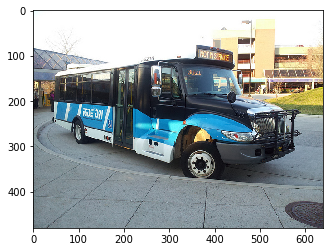

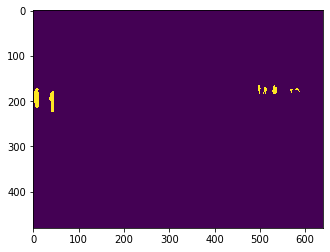

In [25]:
# suppose mask of this image is required from master_df_train
# 475692    ../data/coco/train2017/000000475692.jpg

img_id = 294074
cat_id = 1
print(cat_id)

# bug in get_mask_of_image()
reqd_mask = co_ob.get_mask_of_image(cc1, img_id , cat_id, img_path_df, master_df_train)
# reqd_mask
co_ob.plot_img_and_mask(img_id, reqd_mask, img_path_df)

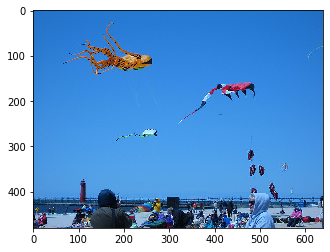

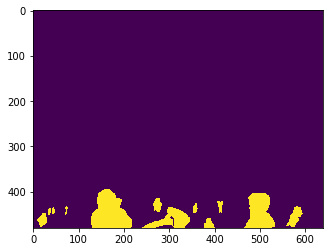

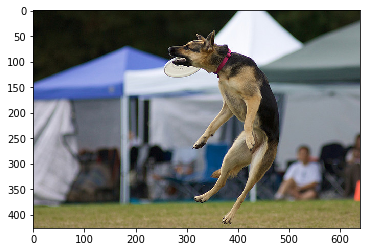

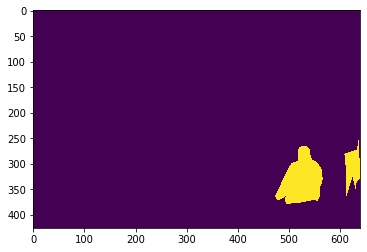

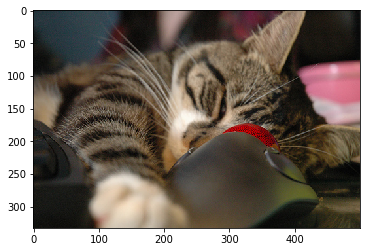

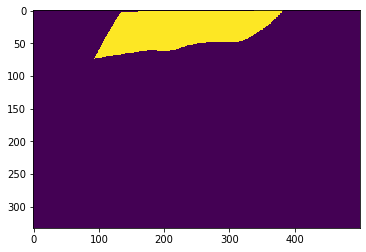

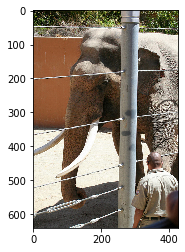

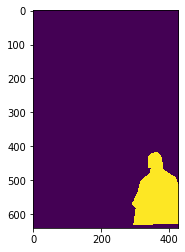

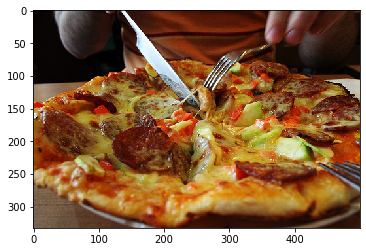

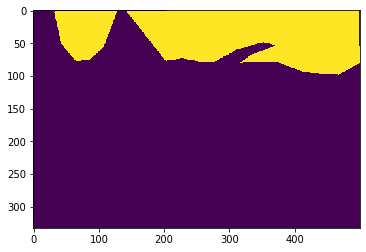

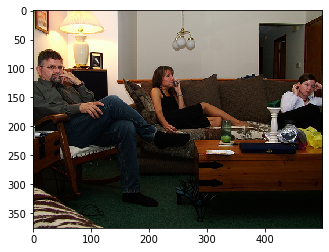

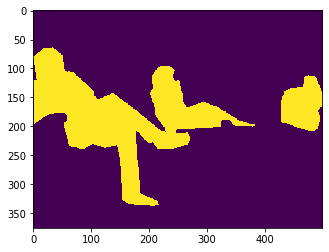

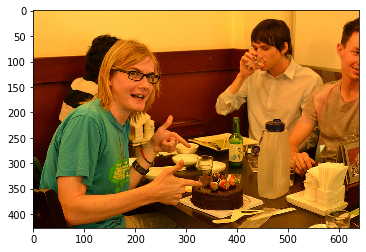

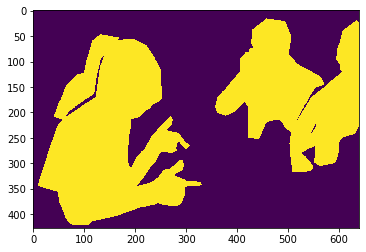

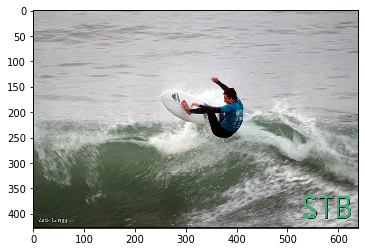

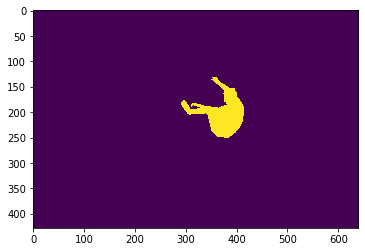

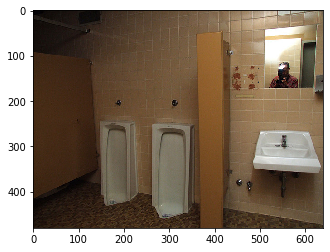

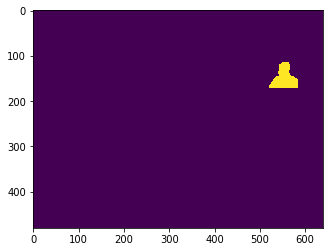

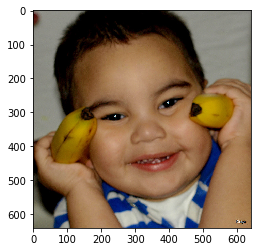

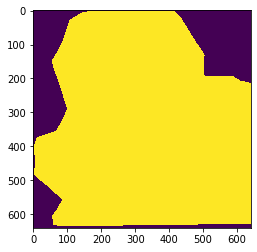

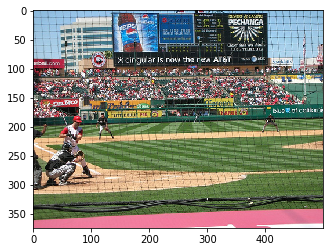

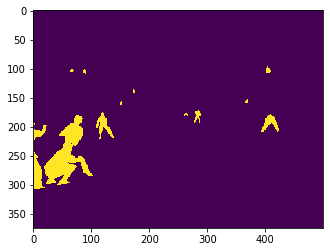

In [38]:
for x,i in enumerate(temp_df['id'].values[460:500]):
    reqd_mask = co_ob.get_mask_of_image(cc1, i , cat_id, img_path_df, master_df_train)
    # reqd_mask
    co_ob.plot_img_and_mask(i, reqd_mask, img_path_df)
    
    if x == 10:
        break

# Visualise Image and Mask

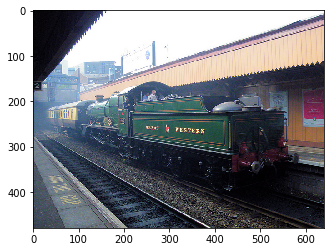

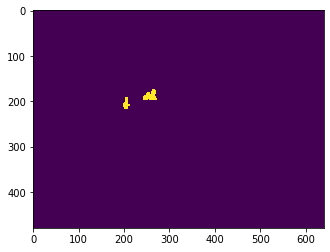

In [20]:
co_ob.plot_img_and_mask(img_id, reqd_mask, img_path_df)